# A very simple SVM demo
Michael Burkhardt <burkhardt.5@osu.edu>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [151]:
seed = np.random.randint(999999)
print(seed)

309142


Interesting seeds:
* 457620


In [152]:
# we create 40 separable points
#num_points = 40
num_points = 8
X, y = make_blobs(n_samples=num_points, centers=((-1,1), (1,-1)), cluster_std=(1.0, 1.0), random_state=seed)

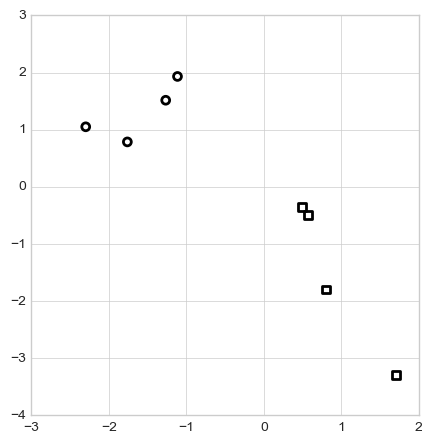

In [153]:
fig = plt.figure(figsize=(5,5), dpi=100)
#plt.style.use('dark_background')
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(1,1,1)
plt.scatter(X[y==0, 0], X[y==0, 1], c='none', marker='o', edgecolor='k', linewidth=2, s=32)
plt.scatter(X[y==1, 0], X[y==1, 1], c='none', marker='s', edgecolor='k', linewidth=2, s=32)
plt.show()

### Train
Note that we're treating the entire dataset as a training set.

In [154]:
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)
print('There are {} support vectors.'.format(len(clf.support_vectors_)))

There are 3 support vectors.


### Plot the points, decision boundar, and margins

(-3.0, 2.0) (-4.0, 3.0)


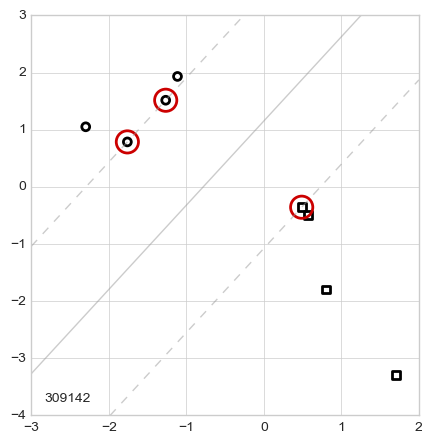

In [155]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(1,1,1)

# Plot the data points
#plt.scatter(X[:,0], X[:,1], marker='.', c=y)
plt.scatter(X[y==0, 0], X[y==0, 1], c='none', marker='o', edgecolor='k', linewidth=2, s=32)
plt.scatter(X[y==1, 0], X[y==1, 1], c='none', marker='s', edgecolor='k', linewidth=2, s=32)

# Mark the support vectors with red circles
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='#CC0000', marker='o', c='None', s=256, linewidth=2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim, ylim)

# create grid
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='#999999', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.text(XX[1][1], YY[1][1], seed)
plt.show()

In [156]:
clf.support_vectors_

array([[-1.26735954,  1.51601184],
       [-1.76212936,  0.78688401],
       [ 0.48720574, -0.35608567]])

(-3.0, 2.0) (-4.0, 3.0)


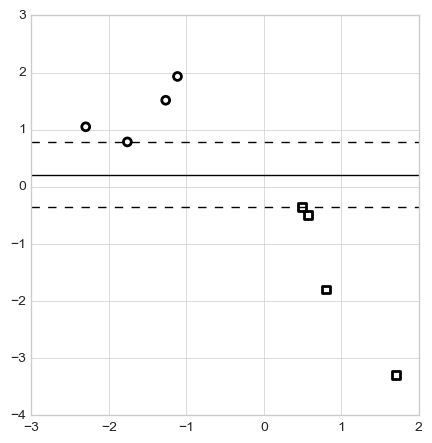

In [161]:
fig = plt.figure(figsize=(5,5), dpi=100)
ax = fig.add_subplot(1,1,1)

# Plot the data points
#plt.scatter(X[:,0], X[:,1], marker='.', c=y)
plt.scatter(X[y==0, 0], X[y==0, 1], c='none', marker='o', edgecolor='k', linewidth=2, s=32)
plt.scatter(X[y==1, 0], X[y==1, 1], c='none', marker='s', edgecolor='k', linewidth=2, s=32)

# Mark the support vectors with red circles
#plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], edgecolors='#CC0000', marker='o', c='None', s=256, linewidth=2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
print(xlim, ylim)

y1 = 0.78688401
y2 = -0.35608567
ax.hlines([y1, np.mean([y1,y2]), y2], xlim[0], xlim[1], linestyles=['--', '-', '--'])

plt.xlim(xlim)
plt.show()

In [112]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']